# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Amanda
- **Email:** amndof@gmail.com
- **ID Dicoding:** brmandw

## Menentukan Pertanyaan Bisnis

- Kapan cuaca yang paling banyak meraih pengguna kasual dan registered?
- Di setiap weather jam berapa yang paling banyak meraih pengguna?

## Import Semua Packages/Library yang Digunakan

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## Data Wrangling

### Gathering Data

In [63]:
hour_df = pd.read_csv('/content/hour.csv')
day_df = pd.read_csv('/content/day.csv')


**Insight:**
Dataset ini berisi jumlah penyewaan sepeda dalam bentuk harian dan jam. Di dalamnya terdapat 17 kolom (16 untuk day karena tanpa kolom hour) yang terdiri dari
- instant -> index
- dteday -> tanggal (YYYY-MM-DD)
- season -> 1, 2, 3, 4
- yr -> 0: 2011, 1: 2012
- mnth -> 1-12
- hr (hanya di hour) -> 0-23     
- holiday -> 0: True (holiday bukan weekend), 1: False
- weekday -> 0-6; minggu-sabtu
- workingday -> 0: weekend, 1: weekday (working day)
- weathersit -> 1-4
- temp -> temperatur (celsius)
- atemp -> temperatur terasa seperti (celcius)
- hum -> kelembapan
- windspeed -> kecepatan angin
- casual -> jumlah pengguna kasual (not registered)
- registered -> jumlah pengguna registered (terdaftar)
- cnt -> jumlah pengguna casual dan registered  

### Assessing Data

In [64]:
hour_df.head()
hour_df.info()
hour_df.describe()
hour_df.isna().sum()
hour_df.duplicated().sum()

day_df.head()
day_df.info()
day_df.describe()
day_df.isna().sum()
day_df.duplicated().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

0

** Comments **
<br> Lakukan pengecekan kualitas data dengan function
- head() -> dataframe;
- info() -> tipe value;
- describe() -> data statistik;
- isna() + sum() -> jumlah data hilang
- duplicated() + sum() -> jumlah data duplikat

**Insight:**
- Tidak terdapat data hilang, data duplikat pada kedua dataset tersebut
- Tipe data dteday adalah object, seharusnya datetime

### Cleaning Data

In [65]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

** Comments **
<br> Karena hanya tipe data dteday yang tidak sesuai jadi hanya mengganti tipe data dteday hour dan day dari object ke datetime dengan fitur library pandas Dataframe()

**Insight:**
- Mengubah tipe value dteday ke datetime
- Data siap digunakan

## Exploratory Data Analysis (EDA)

### Explore ...

In [66]:
banyak_user_weather = hour_df.groupby(by=["weathersit"]).cnt.sum().sort_values(ascending=False).reset_index()

banyak_user_weather.head()


,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223


** Comments **
<br> Untuk mencari jumlah terbanyak user berdasarkan weather maka dibuat pivot tabel berisi jumlah kolom cnt berdsarkan weathersit dan diurutkan berdasarkan terbanyak

**Insight:**
- User casual + registered paling banyak adalah pada cuaca 1 ( Clear, Few clouds, Partly cloudy, Partly cloudy )
- User casual + registered paling sedikit adalah pada cuaca 4 ( Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog )

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-67-423e42d798af>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  banyak_user_weather = hour_df.groupby(by=["weather_cut"]).cnt.sum().sort_values(ascending=True).reset_index()
<ipython-input-67-423e42d798af>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


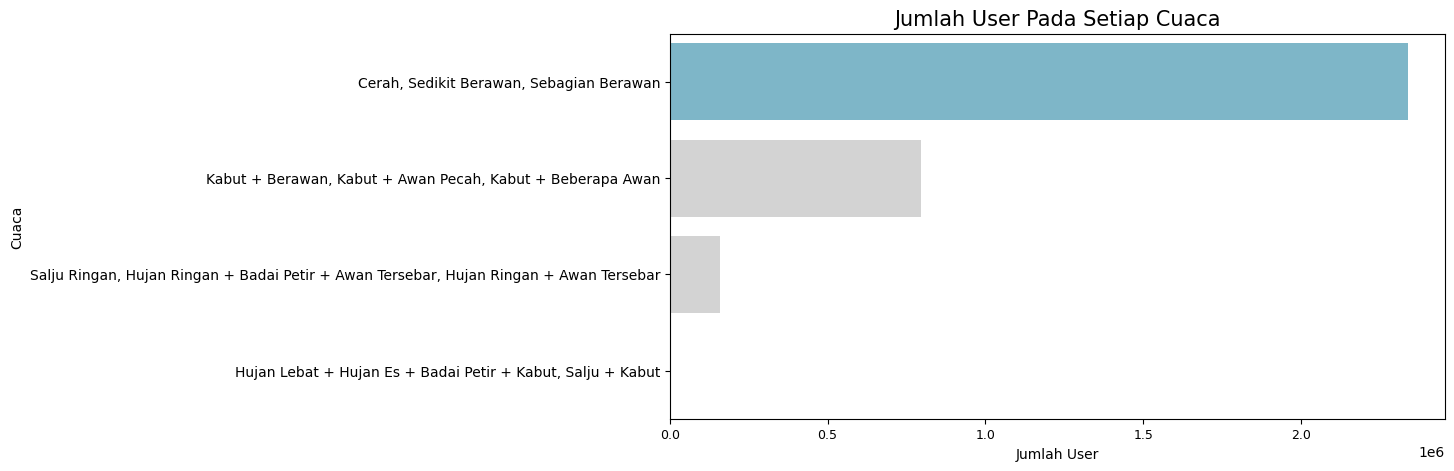

In [67]:
hour_df['weather_cut'] = pd.cut(hour_df.weathersit, bins=4,
                                labels=['Cerah, Sedikit Berawan, Sebagian Berawan',
                                        'Kabut + Berawan, Kabut + Awan Pecah, Kabut + Beberapa Awan',
                                        'Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar',
                                        'Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut'])

banyak_user_weather = hour_df.groupby(by=["weather_cut"]).cnt.sum().sort_values(ascending=True).reset_index()
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="weather_cut",
    x="cnt",
    data=banyak_user_weather,
    palette=colors
)

plt.title("Jumlah User Pada Setiap Cuaca", loc="center", fontsize=15)
plt.ylabel("Cuaca")
plt.xlabel("Jumlah User")
plt.tick_params(axis='x', labelsize=9)
plt.show()

**Comments**
<br> Membuat tampilan dengan bar plot fitur dari seaborn dan plt. Melakukan teknik analisis dengan membuat kolom baru dengan fitur cut pandas berisi value weathersit menjadi kategorikal. Ambil data cnt dan weather_cut untuk menampilkan data user terbanyak dari setiap weathersit.

### Pertanyaan 2:

<ipython-input-68-c6ee8e72c238>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  banyak_user_jam_weather = hour_df.groupby(by=["hr_cut", "weathersit"]).cnt.sum().reset_index()


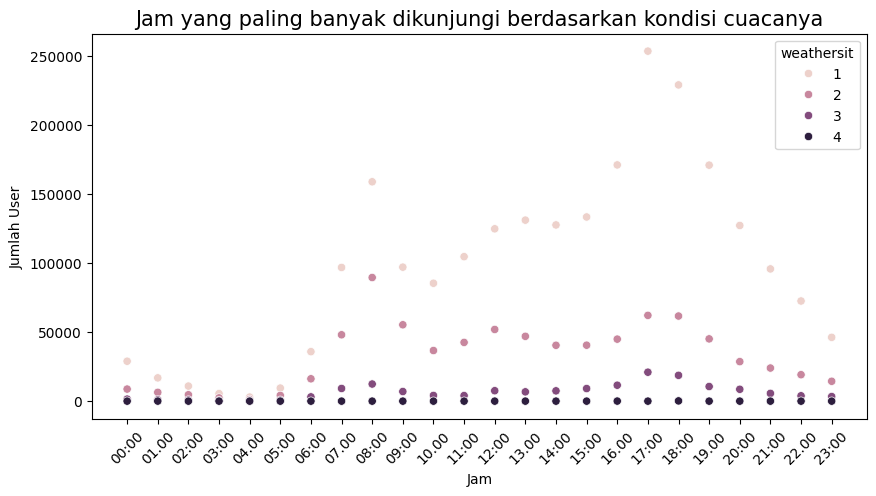

In [68]:
hour_df['hr_cut']=pd.cut(hour_df.hr, bins=24, right=False,
                           labels = ['00:00', '01.00','02:00',
                                     '03:00', '04.00','05:00',
                                     '06:00', '07.00','08:00',
                                     '09:00', '10.00','11:00',
                                     '12:00', '13.00','14:00',
                                     '15:00', '16.00','17:00',
                                     '18:00', '19.00','20:00',
                                     '21:00', '22.00','23:00',])

banyak_user_jam_weather = hour_df.groupby(by=["hr_cut", "weathersit"]).cnt.sum().reset_index()

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=banyak_user_jam_weather,
    x="hr_cut",
    y="cnt",
    hue="weathersit",
)
plt.title("Jam yang paling banyak dikunjungi berdasarkan kondisi cuacanya", loc="center", fontsize=15)
plt.ylabel("Jumlah User")
plt.xlabel("Jam")
plt.tick_params(axis='x', labelsize=10 )
plt.xticks(rotation=45)
plt.show()




**Comments**
<br> Membuat kolom baru hour_cut dengan cut pandas untuk mendeskripsikan value jam lebih detail. Kemudian membuat tabel pivot banyak user berdasarkan weather dan hour_cut. Lalu membuat tampilan dengan scatterplot dari seaborn. Muncul hasil yang terlihat dari chart titik data user paling banyak berdasarkan jam dan weather.

**Insight:**
- Kapan cuaca yang paling banyak meraih pengguna casual dan registered? -> Berdasarkan barplot di atas cuaca yang paling disering meraih user adalah cuaca cerah dan berawan dan yang paling sedikit adalah cuaca hujan lebat, salju lebat, dll

- Di setiap weather, jam berapa yang paling banyak meraih pengguna?
--> Weather 1 = Pukul 17:00 (5 sore)
--> Weather 2 = Pukul 08:00 (8 pagi)
--> Weather 3 = Pukul 17.00 (5 sore)
--> Weather 4 = Pukul 01:00 (1 malam)

weathersit :

1. Cerah, Sedikit Berawan, Sebagian Berawan
2. Kabut + Berawan, Kabut + Awan Pecah, Kabut + Beberapa Awan
3. Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
4. Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut

